In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r'town_1959_2.csv'

townDataset = pd.read_csv(path, encoding = 'cp1251')

In [3]:
townDataset.head()

,номер,город,население
0,1,Москва,5046.0
1,2,Санкт-Петербург,3003.0
2,3,Нижний_Новгород,941.0
3,4,Новосибирск,885.0
4,5,Самара,806.0


In [4]:
nulls = townDataset.isnull().sum(axis = 0)
print(nulls)

номер        0
город        0
население    0
dtype: int64


In [5]:
description = townDataset.describe().T
description

,count,mean,std,min,25%,50%,75%,max
население,1004.0,52.925199,204.885662,0.1,10.7,19.25,37.975,5046.0


### Описание данных выборки
- кол-во данных - 1004
- минимальное - 0,1
- 1й квартиль -10,7
- медиана - 19,25
- среднее - 52,93
- 3й квартиль - 37,98
- максимальное - 5046  
- стандартное отклонение - 204,89

#### среднее значение больше 3-го квартиля!


In [6]:
probability_below_mean = \
    (townDataset[description.index] < description['mean'])\
    .sum()/description['count']
print(f'Процент наблюдений ниже среднего',
    f'{round(probability_below_mean.values[0]*100,2)}%')

Процент наблюдений ниже среднего 82.37%


In [7]:
for i in list(range(3,6)) + list(range(12, 30, 12)): 
    lower_border = description['mean']-i*description['std']
    upper_border = description['mean']+i*description['std']
    num = ((townDataset[description.index] > upper_border).sum() + 
     (townDataset[description.index] < lower_border).sum()).values[0]
    if num > 0:
        print('Количество городов не вписывающихся в правило', i,
              'сигм:', num)
_ = sorted(townDataset.values, 
       key = lambda x: x[2], reverse = True)
print('\nОтсортированный список городов (первые 10 значений):')
sortedTownDataset = pd.DataFrame(data = _, columns = townDataset.columns)
sortedTownDataset.head(10)

Количество городов не вписывающихся в правило 3 сигм: 7
Количество городов не вписывающихся в правило 4 сигм: 4
Количество городов не вписывающихся в правило 5 сигм: 2
Количество городов не вписывающихся в правило 12 сигм: 2
Количество городов не вписывающихся в правило 24 сигм: 1

Отсортированный список городов (первые 10 значений):


,номер,город,население
0,1,Москва,5046.0
1,2,Санкт-Петербург,3003.0
2,3,Нижний_Новгород,941.0
3,4,Новосибирск,885.0
4,5,Самара,806.0
5,6,Екатеринбург,779.0
6,7,Челябинск,689.0
7,8,Казань,667.0
8,9,Пермь,629.0
9,10,Ростов-на-Дону,600.0


### Исключение выбросов

Два города, наиболее сильно отличающихся от выборки: Москва и Санкт-Петербург. Не вписываются в правило 5 и 12 сигм. Признаем их выбросами и исключим из выборки.

In [8]:
clearedDataSet = sortedTownDataset[2:]
clearedDataSet.head(4)

,номер,город,население
2,3,Нижний_Новгород,941.0
3,4,Новосибирск,885.0
4,5,Самара,806.0
5,6,Екатеринбург,779.0


In [9]:
clearedDescription = clearedDataSet.describe().T
clearedDescription

,count,mean,std,min,25%,50%,75%,max
население,1002.0,44.997904,91.645867,0.1,10.7,19.15,37.55,941.0


### Описание данных выборки
- кол-во данных - 1002 (1004)
- минимальное - 0,1
- 1й квартиль - 10,7
- медиана - 19,15 (19,25)
- среднее - 45, (52,93)
- 3й квартиль - 37,55, (37,98)
- максимальное - 941, (5046)  
- стандартное отклонение - 91,65, (204,89)

#### среднее значение всё еще больше 3-го квартиля


In [10]:
print('Уменьшение характиристик после отбрасывания к прежним:')
(1 - clearedDescription/description)*100

Уменьшение характиристик после отбрасывания к прежним:


,count,mean,std,min,25%,50%,75%,max
население,0.199203,14.9783,55.269751,0.0,0.0,0.519481,1.119157,81.351566


###### После отбрасывания 0.2% наблюдений 
- среднее арифметическое уменьшилось на 15%
- медиана же уменьшилась на 0,5%

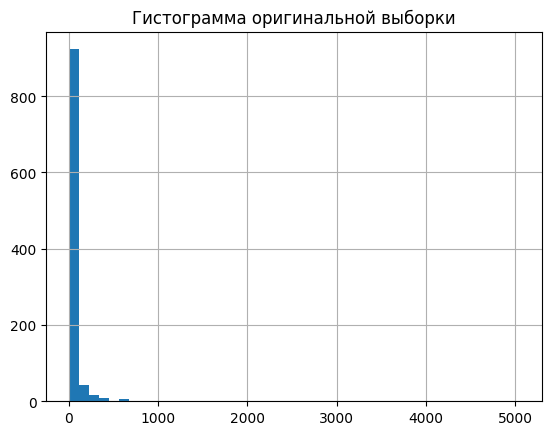

In [11]:
counts, bins = np.histogram(townDataset["население"], bins = 45)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Гистограмма оригинальной выборки')
plt.grid()

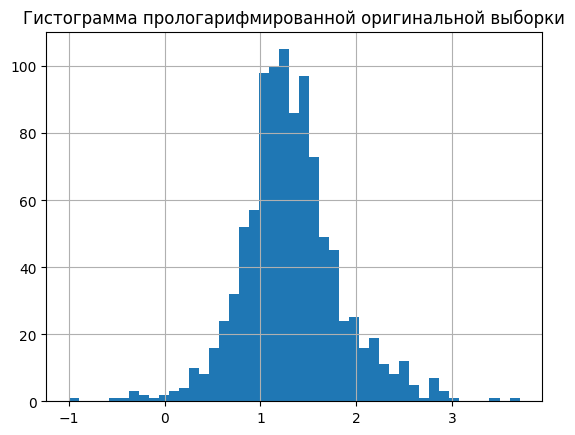

In [12]:
counts, bins = np.histogram(np.log10(townDataset["население"]), 
                            bins = 45)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Гистограмма прологарифмированной оригинальной выборки')
plt.grid()

In [13]:
temp = pd.DataFrame(data=[
    townDataset["население"].values,
    clearedDataSet['население'].values,
    np.log10(townDataset["население"].values),
    np.log10(clearedDataSet["население"]).values,
    ],
    index = ['оригинал','без выбросов',
             'прологарифмированный','прологарифмированный без выбросов']).T

<Axes: >

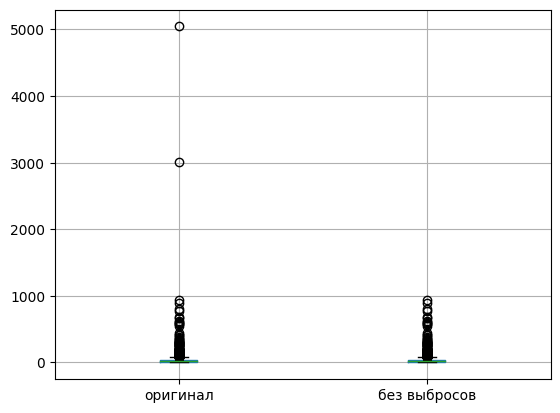

In [14]:
temp.iloc[:,[0,1]].boxplot()

<Axes: >

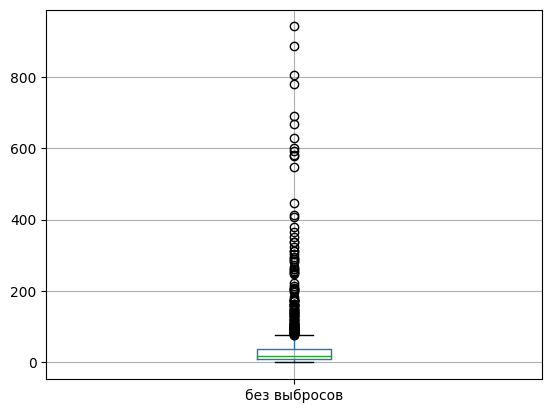

In [15]:
temp.iloc[:,[1]].boxplot()

<Axes: >

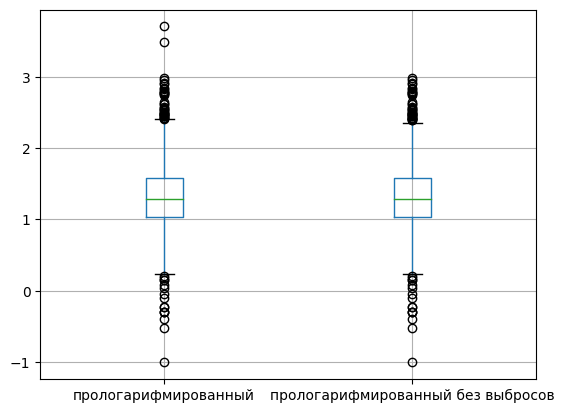

In [16]:
temp.iloc[:,[2,3]].boxplot()